In [1]:
#TEST GIT AUGUSTIN

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook 
plt.rcParams["figure.figsize"] = (3,3)
from mpl_toolkits.mplot3d import Axes3D

Simulation de systèmes hamiltoniens
==============================

Considérons un système hamiltonien d'état $x=(q,p)\in \mathbb{R}^d \times \mathbb{R}^d$, où $q$ et $p$ sont les positions généralisées et quantités de mouvement respectivement, de dynamique
\begin{align*}
\dot{q} &= f_q(p) \\
\dot{p} &= f_p(q)
\end{align*}
avec
\begin{align*}
f_q(p) &= \nabla_p H(q,p)  \\
f_p(q) &= - \nabla_q H(q,p) 
\end{align*}
où $H: \mathbb{R}^d \times \mathbb{R}^d\to \mathbb{R}$ est le hamiltonien du type
$$
H(p,q) = \frac{1}{2}p^\top M^{-1} p + U(q)
$$
avec $M\in \mathbb{R}^{d\times d}$ la matrice de masses (généralisées) et $U$ un potentiel qui varie selon les applications.

Des exemples typiques de systèmes hamiltoniens sont les systèmes à N corps en interation : planètes en interaction gravitationnelle, particules quantiques en interaction électrostatique, molécules en interaction (potentiel de Lennard-Jones), etc... Dans ce cas, $d$ est égale à N fois la dimension des positions $q_k$ caractérisant chaque corps, avec
$$
q=(q_1,\ldots,q_k,\ldots, q_N) \quad , \quad p=(p_1,\ldots,p_k,\ldots, p_N)
$$
et donc
\begin{align*}
\dot{q}_k &= f_{q_k}(p) = \nabla_{p_k} H(q,p)  \\
\dot{p}_k &= f_{p_k}(q) = - \nabla_{q_k} H(q,p) 
\end{align*}
$M$ est typiquement diagonale contenant la masse de chaque corps, et $U$ est de la forme
$$
U(q) = \sum_{1\leq l < k\leq N} \varphi(\|q_k-q_l\|)
$$
où $\varphi : \mathbb{R} \to \mathbb{R}$ dépend de l'application.

**Question 1** Montrer qu'alors
$$
\dot{q}_k = f_{q_k}(p) = \frac{1}{m_k} p_k \qquad , \qquad  \dot{p}_k = f_{p_k}(q) = -\sum_{l \neq k} \varphi'(\|q_k-q_l\|)\frac{q_k-q_l}{\|q_k-q_l\|}
$$

Vérifier par le calcul que $H$ est conservée le long des trajectoires.

**Question 2**
On propose de simuler plusieurs planètes en interaction gravitationnelle. Choisir un des deux scénarios suivants :
- mouvement planaire de deux planètes dans $\mathbb{R}^2$ (problème de Kepler à deux corps)
- système solaire à $N$ planètes dans $\mathbb{R}^3$.

et définir les fonctions $U$, $H$, $f_q$, $f_p$ et $f=(f_q,f_p)$ correspondantes. Nous vous donnons ci-dessous les paramètres à utiliser pour la simulation dans chacun des deux scénarios.


In [2]:
# EXAMPLE 1 : KEPLER PROBLEM (here written for 2 planets but can also be written in relative coordinates with respect to one planet)
N = 2  # number of bodies
dim = 2 # dimension of position of each body
d = N*dim
m_list = [100,1]  # list of masses (normalized)
G = 1
# parametersx for simulation
e = 0.6
t0, tf = 0.0, 10.0   # with time step dt < 0.01
q0 = [0,0,1-e,0]
p0 = [0,0,0,np.sqrt((1+e)/(1-e))]
x0 = np.concatenate([q0,p0])

# EXAMPLE 2 : SOLAR SYSTEM
N = 4  # number of bodies 
# if you want to add other planets please use the parameters in the table below extracted from 
# [Ernst Hairer, Christian Lubich, Gerhard Wanner, Geometric Numerical Integration Structure-Preserving Algorithms for Ordinary Differential Equations
dim = 3 # dimension of position of each body
d = N*dim
G = 2.95912208286*10**(-4);  # normalized gravity constant
m_list = [1.00000597682,0.000954786104043,0.000285583733151,0.0000437273164546]  # N masses : sun+close planets, jupiter, saturn, uranus (ratio relative to sun)
t0, tf = 0.0, 40000   # in sun days   # with time step dt > 1
q0 = [0,0,0,-3.5023653,-3.8169847,-1.5507963,9.0755314,-3.0458353,-1.6483708,8.3101420,-16.2901086,-7.2521278]
p0 = [0,0,0,m_list[1]*0.00565429,-m_list[1]*0.00412490,-m_list[1]*0.00190589,m_list[2]*0.00168318,m_list[2]*0.00483525,m_list[2]*0.00192462,m_list[3]*0.00354178,m_list[3]*0.00137102,m_list[3]*0.00055029]
x0 = np.concatenate([q0,p0])


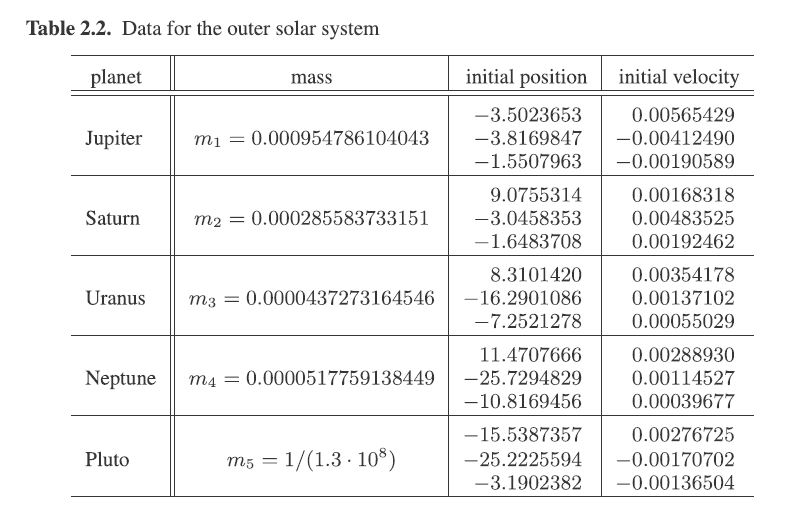

In [7]:
from math import *

# structure : x = (q, p) = (q1,q2,...,qN, p1,p2,...,pN)
M = np.kron(np.diag(m_list),np.eye(dim))   # matrix M of dimension d containing the masses
M_inv = np.linalg.inv(M)

def U(q):  # q = (q1, q2, ... qN)    
    u = 0
    for k in range(len(q)):
        qk = q[k]
        for l in range(k):
            ql = q[l]
            dist=sqrt((qk[0]-ql[0])**2 + (qk[1]-ql[1])**2 + (qk[2]-ql[2])**2)
            u -=  G*m_list[k]*m_list[l]/dist
    return u

def H(x):    # x = (q, p) = (q1,q2,...,qN, p1,p2,...,pN)
    q = x[0]
    p = x[1]
    pt=np.transpose(p)
    return 0.5*pt.np.dot(M_inv.np.dot(p)) + U(q)

def fq(p):   # p = (p1,p2,...,pN)
    N = len(p)
    l = np.empty((3,N))
    for k in range(N):
        l[:, k] = p[k]/m_list[k]        
    return l

def fp(q):  # q = (q1,q2,...,qN)
    N = len(q)
    L = np.empty((3,N))
    for k in range(N): 
        S = 0 
        qk = q[k]
        for l in range(N): 
            ql = q[l]
            if l != k: 
                dist = sqrt((qk[0]-ql[0])**2 + (qk[1]-ql[1])**2 + (qk[2]-ql[2])**2)
                S -= ( G*m_list[k]*m_list[l]/(dist**3))*(qk-ql)   
        L[:, k] = S
    return L

def f(x):
    N = len(x[0])
    q = x[:N*dim]
    p = x[N*dim:]
    return np.concatenate([fq(p),fp(q)])

# TEST example 1
#print(fp(np.array([[0,0],[2,3]])))
#print(f(np.array([0,0,2,3,0,0,0,0])))

# TEST example 2
print(fp(np.array([[0,0,0],[2,3,4],[-1,3,4],[-1,3,6]])))
print(fq(np.array([[0,0,0],[2,3,4],[-1,3,4],[-1,3,6]])))
#print(f(np.array([[0,0,0],[2,3,0],[-1,3,5],[-1,3,10],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])))

[[ 2.93938599e-09 -3.62805589e-09  6.46404628e-10  4.22652676e-11]
 [ 7.46419184e-09 -5.42744994e-09 -1.91231829e-09 -1.24423614e-10]
 [ 1.00352049e-08 -7.23607276e-09 -2.54883389e-09 -2.50298205e-10]]
[[     0.           2094.71        -3501.59999999 -22868.99999999]
 [     0.           3142.065       10504.79999998  68606.99999998]
 [     0.           4189.42        14006.39999998 137213.99999997]]


Euler explicite
================

**Question 3** Compléter la fonction ci-dessous prenant en entrée une fonction $f: \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(x)$. La tester sur une équation différentielle simple aux solutions exactes connues.

<IPython.core.display.Javascript object>


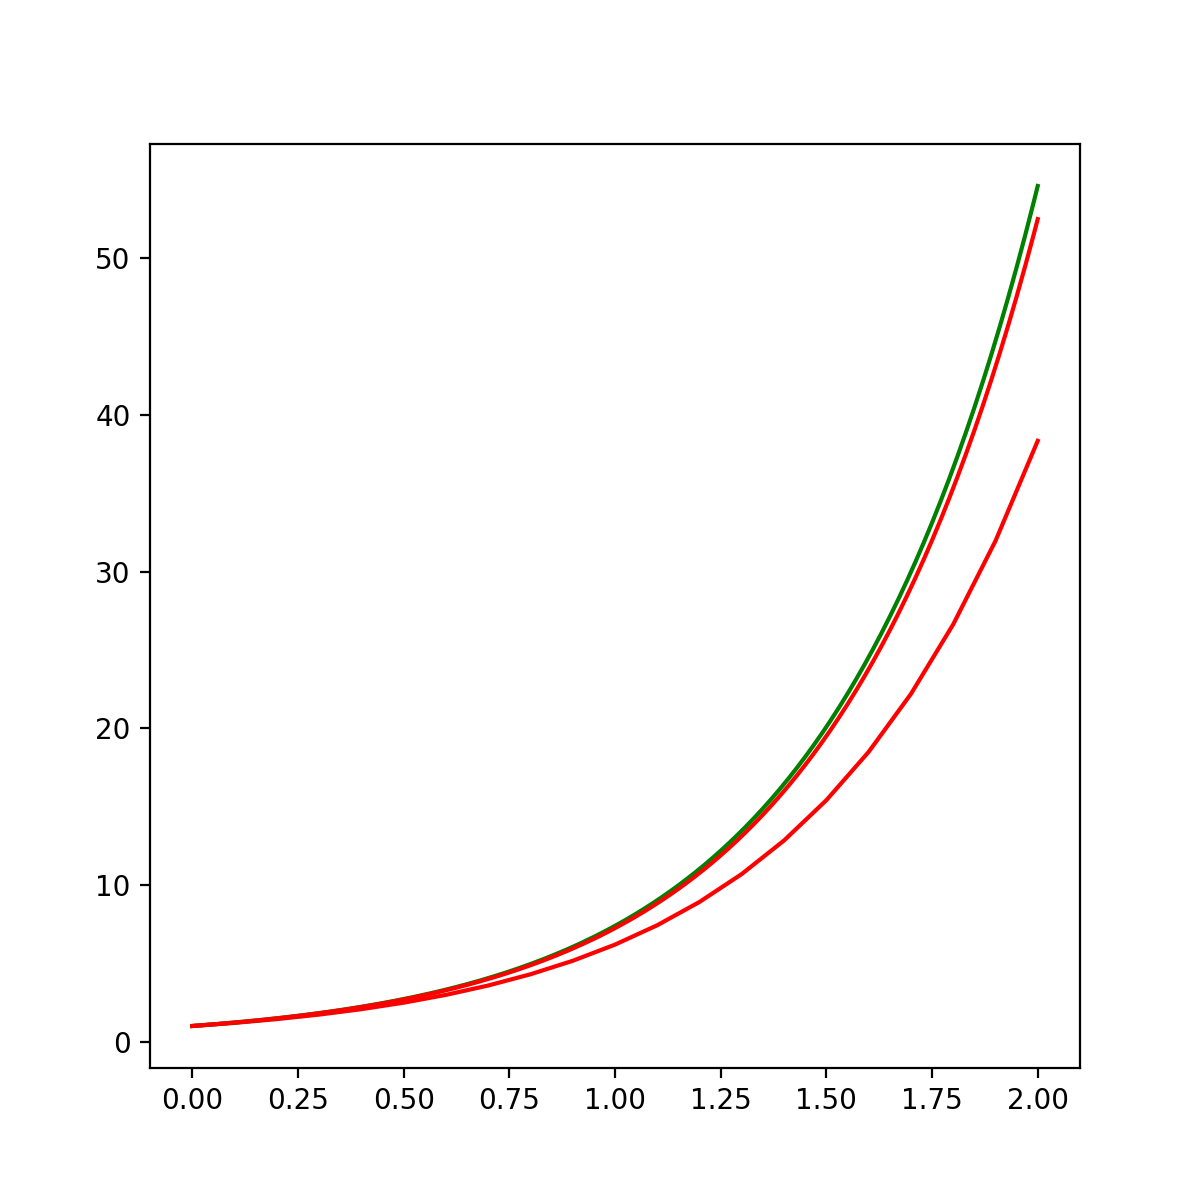

In [25]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    ts, xs = [t0], [x0]  #ts pour temps solution, xs pour x solution 
    x = x0
    while ts[-1] < tf:  
        x = x + dt*f(x)
        xs.append(x)
        ts.append(ts[-1]+dt)
    return (np.array(ts), np.array(xs).T)

def f(x): 
    return 2*x

def h(t): 
    return np.exp(2*t)

T, Y1 = solve_euler_explicit(f, 1, 0.1, 0, 2)
plt.plot(T,Y1, color = 'red')

T, Y2 = solve_euler_explicit(f, 1, 0.01, 0, 2)
Yv = [h(t) for t in T]
plt.plot(T,Yv, color = "green")
plt.plot(T,Y2, color = "red")
plt.show()


En rouge la courbe obtenue avec Newton explicite, en vert la véritable solution. On observe bien que la courbe rouge s'écarte de plus de plus en plus de la courbe rouge avec t qui croit. On remarque que plus le pas de temps est faible, plus la courbe rouge se rapproche de la verte. 

**Question 4** Utiliser le schéma d'Euler pour simuler les trajectoires des planètes. Visualiser l'évolution des positions $t\mapsto q(t)$ et du hamiltonien $H$. Ce schéma numérique vous semble-t-il adapté ? Que se passe-t-il lorsque $\Delta t$ tend vers 0 pour un horizon de temps $t_f$ donné ? Et à $\Delta t$ fixé, lorsque $t_f$ augmente ? Commenter.

In [ ]:
dt = ...
t_explicit, x_explicit = solve_euler_explicit(f, x0, dt, t0, tf)

...

Euler symplectique
==============

On cherche maintenant un schéma plus adapté. Pour cela, nous allons chercher un schéma, dit *symplectique*.

 
Notons d'abord qu'en définissant la matrice par blocs
$$
S = \left(
\begin{matrix}
0 & I_d \\
-I_d & 0
\end{matrix}
\right) \in \mathbb{R}^{2d\times 2d}
$$
la dynamique se réécrit
$$
\dot{x} = 
\left(
\begin{matrix}
f_q(p)\\
f_p(q)
\end{matrix}
\right)
= f(x) = S \ \nabla H(x) \ .
$$

**Question 4** Pour $d=1$, $x_a=(q_a,p_a)\in \mathbb{R}^2$ et $x_b=(q_b,p_b)\in \mathbb{R}^2$, justifier que $x_a^\top S x_b$ représente l'aire orientée du parallélogramme généré par $x_a$ et $x_b$.

On étend cette définition au cas $d>1$, où $x_a^\top S x_b$ avec $x_a,x_b\in \mathbb{R}^{2d}$ représente alors la somme des aires orientées des projections orthogonales sur chaque plan $(q_i,p_i)$ du parallélogrammes généré dans $\mathbb{R}^{2d}$ par $x_a,x_b$. Une transformation $C^1$ $\phi : \mathbb{R}^{2d}\to \mathbb{R}^{2d}$ est alors dite *symplectique*  si sa matrice jacobienne conserve l'aire, c'est-à-dire si
$$
J_\phi(x_a)^\top S J_\phi(x_b) = S \qquad \forall x_a,x_b\in \mathbb{R}^{2d}
$$



**Question 5 (Bonus)** Pour $t\in \mathbb{R}$, on définit le flot $\varphi_t : \mathbb{R}^{2d}\to \mathbb{R}^{2d}$ tel que $\varphi_t(x_0)$ donne la valeur au temps $t$ de la solution initialisée en $x_0$ à $t=0$. Montrer que pour un système hamiltonien, le flot est symplectique (Poincaré 1899). *Indice : montrer que $\frac{d}{dt} J_{\varphi_t}(x_a)^\top S J_{\varphi_t}(x_b)=0$.*

En d'autres termes, si l'on suit comment se déforme au cours du temps un ensemble de conditions initiales, on verra que l'ensemble se déforme mais conserve son aire. Le problème c'est que les schémas numériques usuels (dont les schémas d'Euler implicite et explicite) ne garantissent pas cette conservation. 

Considérons plutôt les schémas suivants, appelés *Euler Symplectiques*, qui ''mélangent'' les schémas d'Euler implicites et explicites :
$$
(A)
\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j}) \\
p^{j+1} &=& p^{j} + \Delta t \, f_p(q^{j+1})
\end{array}
\right.
\qquad \text{ou} \qquad
(B)
\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j+1}) \\
p^{j+1} &=& p^{j} + \Delta t \, f_p(q^{j})
\end{array}
\right.
$$

**Question 6** Réécrire un de ces schémas sous la forme $x^{j+1}=\Phi(x^j)$, pour $x^j=(q^j,p^j)$ et vérifier que $\Phi$ est symplectique. Justifier que ce schéma est toujours d'ordre 1.

**Question 7** Coder ce schéma et le tester sur le système hamiltonien. Comment évolue $H$ maintenant ? Comparer aux conclusions tirées pour le schéma d'Euler explicite.

In [ ]:
def solve_euler_symplectic(fq,fp, x0, dt, t0, tf):
    ts, xs = [t0], [x0]
    while ts[-1] < tf:
        ...
    return (np.array(ts), np.array(xs).T)

In [ ]:
dt = ...
t_symplectic, x_symplectic = solve_euler_symplectic(fq,fp, x0, dt, t0, tf)


**Question 8 (BONUS)** On considère enfin la célèbre méthode de Störmer-Verlet
\begin{align*}
p^{j+1/2} &= p^{j} + \frac{\Delta t}{2} \, f_p(q^{j})\\
q^{j+1} &= q^{j} + \Delta t \,  f_q(p^{j+1/2}) \\
p^{j+1} &= p^{j+1/2} + \frac{\Delta t}{2} \, f_p(q^{j+1})
\end{align*}
construite à partir de la composition des deux schémas d'Euler symplectiques (A) et (B) ci-dessus. Justifier qu'elle est toujours symplectique mais qu'elle est maintenant d'ordre 2. Appliquer cette méthode au système hamiltonien et comparer les performances.

In [ ]:
def solve_euler_symplectic_SV(fq,fp, x0, dt, t0, tf):
    ts, xs = [t0], [x0]
    while ts[-1] < tf:
        ...
    return (np.array(ts), np.array(xs).T)

In [ ]:
t_symplectic_SV, x_symplectic_SV = solve_euler_symplectic_SV(fq,fp, x0, dt, t0, tf)
